<a href="https://colab.research.google.com/github/Gunehee/Global-Population-and-Migration/blob/main/Global_Population_and_Migration_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Population and Migration: An Exploratory Data Analysis

**Author:** GunHee(Joshua) Lee

**Data Source:** Custom dataset on population and net migration for 186 countries (annual, multi-year)

## Executive Summary

This project investigates global population dynamics and migration trends using a comprehensive dataset covering 186 countries over several decades. Through robust data cleaning, exploratory data analysis (EDA), and impactful visualizations, the project extracts actionable insights on demographic shifts and migration patterns. The findings are intended to inform policymakers, researchers, and organizations about key population trends and their implications.

---


# Introduction

Population growth and migration are critical factors shaping global social, economic, and political landscapes. Understanding how populations evolve and how people move between countries is vital for effective policy, business strategy, and academic research.

This analysis aims to:
- Uncover major trends in global population and net migration.
- Identify countries with significant demographic or migration shifts.
- Present actionable insights through compelling data visualizations.

---

In [ ]:
# Data Overview
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import warnings
import matplotlib.ticker as ticker

# Pre-configurations
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore", category=FutureWarning)

# Load Dataset & Preprocessing
# ----------------------------------------------
# Download the latest dataset
path = kagglehub.dataset_download("hashimkhanwazir/global-population-and-migration-dataset")
print("Path to dataset files:", path)

# Load data
file_path = '/root/.cache/kagglehub/datasets/hashimkhanwazir/global-population-and-migration-dataset/versions/1/world_pop_mig_186_countries.csv'
df = pd.read_csv(file_path)

# Show dataset shape and sample
print(f"Shape: {df.shape}")
display(df.head(10))

# Show basic stats and column info
df.info()
display(df.describe())

Path to dataset files: /kaggle/input/global-population-and-migration-dataset
Shape: (11904, 5)


,country,year,population,netMigration,population_in_millions
0,Afghanistan,2023,42239854.00,-65846.00,42
1,Afghanistan,2022,41128771.00,-65846.00,41
2,Afghanistan,2021,40099462.00,-183672.00,40
3,Afghanistan,2020,38972230.00,166821.00,38
4,Afghanistan,2019,37769499.00,-8082.00,37
5,Afghanistan,2018,36686784.00,-47205.00,36
6,Afghanistan,2017,35643418.00,-47090.00,35
7,Afghanistan,2016,34636207.00,-90238.00,34
8,Afghanistan,2015,33753499.00,-281739.00,33
9,Afghanistan,2014,32716210.00,255611.00,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11904 entries, 0 to 11903
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 11904 non-null  object 
 1   year                    11904 non-null  int64  
 2   population              11904 non-null  float64
 3   netMigration            11904 non-null  float64
 4   population_in_millions  11904 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 465.1+ KB


,year,population,netMigration,population_in_millions
count,11904.00,11904.00,11904.00,11904.00
mean,1991.50,27038627.98,748.25,26.62
std,18.47,112830459.17,162103.46,112.81
min,1960.00,2646.00,-6673580.00,0.00
25%,1975.75,597329.25,-13252.50,0.00
50%,1991.50,4342185.50,-484.00,4.00
75%,2007.25,13337594.00,5505.50,13.00
max,2023.00,1428627663.00,3366387.00,1428.00


- The dataset contains 11,904 rows and 5 columns, representing country-year pairs.

- Key variables include country, year, population, netMigration, and population_in_millions.

## Data Cleaning & Preprocessing

In [ ]:
# Data Cleaning & Preprocessing

# Check for missing values and duplicates
print("Missing values by column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Remove rows with missing values, if any
df = df.dropna()

# Ensure correct data types
df['year'] = df['year'].astype(int)
df['population'] = df['population'].astype(float)
df['netMigration'] = df['netMigration'].astype(float)
df['population_in_millions'] = df['population_in_millions'].astype(int)

# Create a migration category column
def migration_category(x):
    if x > 100000:
        return "Immigration Country"
    elif x < -100000:
        return "Emigration Country"
    else:
        return "Stable/Neutral"

df['migration_category'] = df['netMigration'].apply(migration_category)

print("Unique migration categories:", df['migration_category'].unique())
display(df.head())


Missing values by column:
 country                   0
year                      0
population                0
netMigration              0
population_in_millions    0
dtype: int64

Duplicate rows: 0
Unique migration categories: ['Stable/Neutral' 'Emigration Country' 'Immigration Country']


,country,year,population,netMigration,population_in_millions,migration_category
0,Afghanistan,2023,42239854.00,-65846.00,42,Stable/Neutral
1,Afghanistan,2022,41128771.00,-65846.00,41,Stable/Neutral
2,Afghanistan,2021,40099462.00,-183672.00,40,Emigration Country
3,Afghanistan,2020,38972230.00,166821.00,38,Immigration Country
4,Afghanistan,2019,37769499.00,-8082.00,37,Stable/Neutral


* Duplicates and missing values are removed to ensure clean data.

* Migration categories are defined for better analytical segmentation:

  - Immigration Country: Large net inflow of people.

  - Emigration Country: Large net outflow.

  - Stable/Neutral: Minor changes.

 ## Exploratory Data Analysis (EDA)

### Global Population Growth Trends

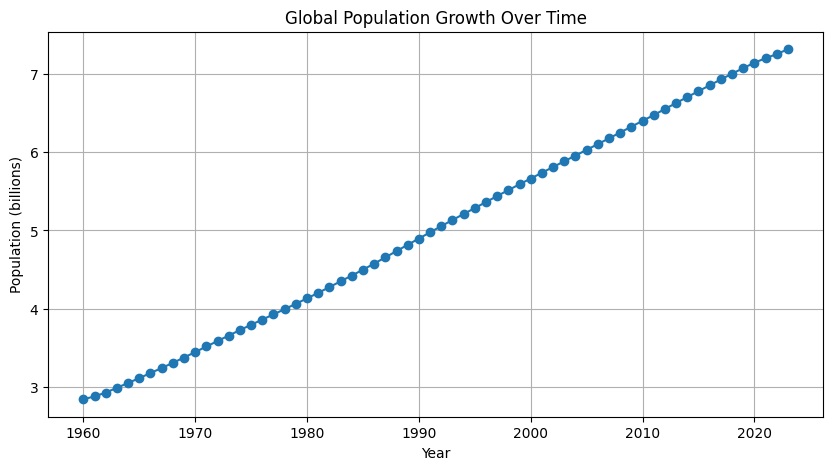

In [ ]:
import matplotlib.pyplot as plt

# Global population by year
global_pop = df.groupby('year')['population'].sum() / 1e9  # in billions

plt.figure(figsize=(10, 5))
plt.plot(global_pop.index, global_pop.values, marker='o')
plt.title("Global Population Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.grid(True)
plt.show()

* This line plot shows the steady increase in global population over time, highlighting major inflection points or slowdowns.

* The x-axis represents years; y-axis shows world population in billions.

###  Top and Bottom Countries by Net Migration

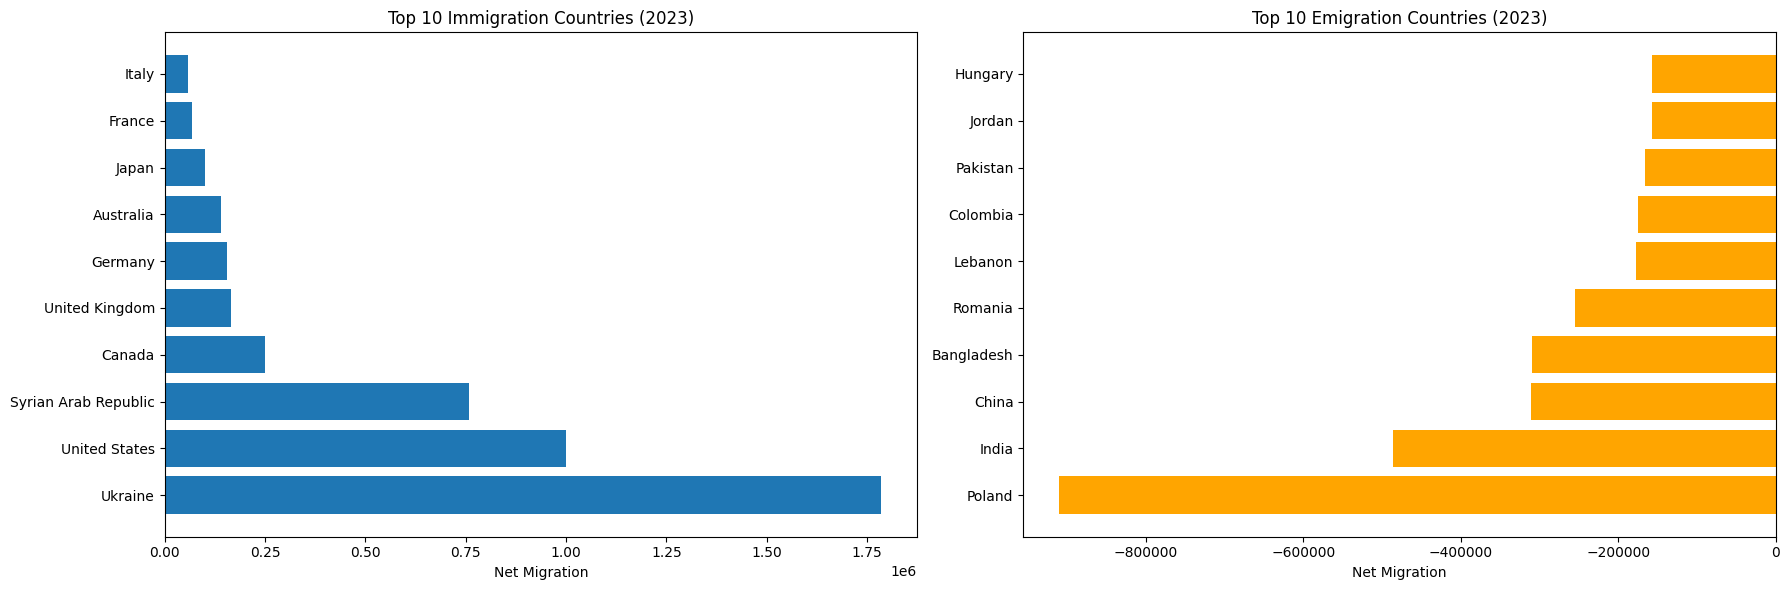

In [ ]:
# Most recent year
latest_year = df['year'].max()

# Top 10 immigration countries (latest year)
top_imm = df[df['year'] == latest_year].sort_values(by='netMigration', ascending=False).head(10)
# Top 10 emigration countries (latest year)
top_emi = df[df['year'] == latest_year].sort_values(by='netMigration').head(10)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].barh(top_imm['country'], top_imm['netMigration'])
ax[0].set_title(f"Top 10 Immigration Countries ({latest_year})")
ax[0].set_xlabel('Net Migration')

ax[1].barh(top_emi['country'], top_emi['netMigration'], color='orange')
ax[1].set_title(f"Top 10 Emigration Countries ({latest_year})")
ax[1].set_xlabel('Net Migration')

plt.tight_layout()
plt.show()

* The left chart displays countries with the highest net migration inflow.

* The right chart shows those with the highest outflow.

* This provides a quick comparison of leading sources and destinations for migration in the latest year.

###  Migration Patterns Over Time

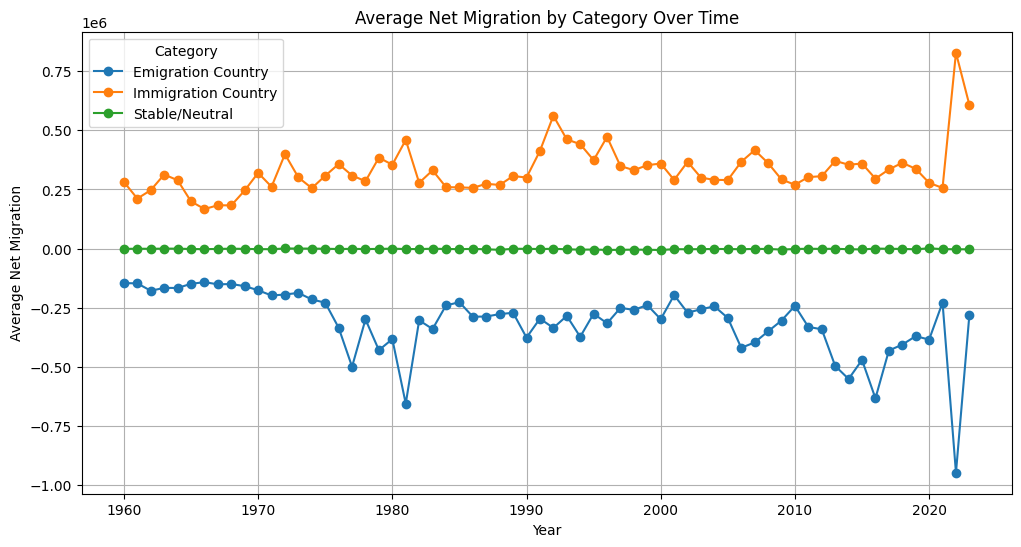

In [ ]:
# Average net migration per category over years
category_trends = df.groupby(['year', 'migration_category'])['netMigration'].mean().reset_index()
pivot_ct = category_trends.pivot(index='year', columns='migration_category', values='netMigration')

pivot_ct.plot(figsize=(12, 6), marker='o')
plt.title("Average Net Migration by Category Over Time")
plt.ylabel("Average Net Migration")
plt.xlabel("Year")
plt.legend(title="Category")
plt.grid(True)
plt.show()

* The line plot tracks how average net migration evolves for each country category.

* This visualizes macro-level trends in global migration dynamics.

### Correlation Between Population and Net Migration

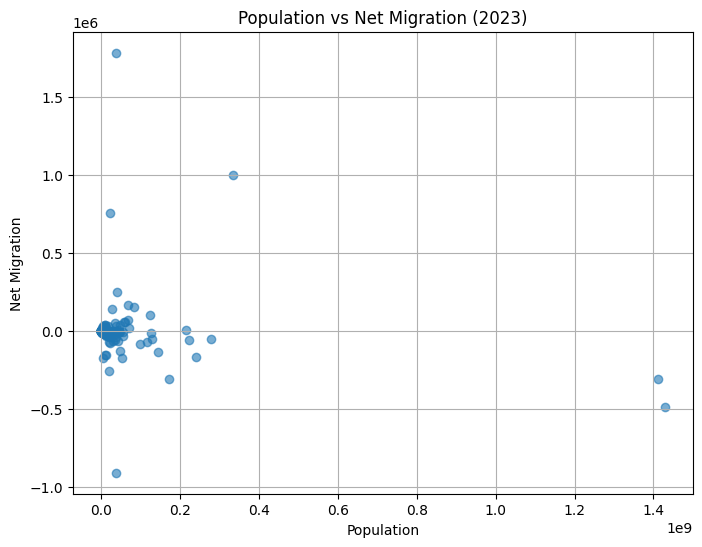

Correlation coefficient: -0.17


In [ ]:
# Correlation and scatter plot for latest year
pop_mig = df[df['year'] == latest_year][['population', 'netMigration']]

plt.figure(figsize=(8, 6))
plt.scatter(pop_mig['population'], pop_mig['netMigration'], alpha=0.6)
plt.title(f"Population vs Net Migration ({latest_year})")
plt.xlabel("Population")
plt.ylabel("Net Migration")
plt.grid(True)
plt.show()

correlation = pop_mig.corr().loc['population', 'netMigration']
print(f"Correlation coefficient: {correlation:.2f}")

 ## Key Findings & Insights

**Global population continues to rise**, though some regions show stagnation or decline.
- **Net migration is highly concentrated**: A small group of countries absorb most global migration inflows.
- **Emigration is also concentrated** in specific regions facing economic, social, or political challenges.
- **There is limited direct correlation** between a country’s population size and its net migration.
- **Migration categories** help distinguish between fundamentally different country profiles.

These findings can inform national migration policies, international aid allocation, and business market analyses.

## Select Top 5 Countries with Extreme Migration Trends (Absolute Value, Latest Year)

In [ ]:
# Select top 5 countries by absolute net migration in the most recent year
latest_year = df['year'].max()
top5 = df[df['year'] == latest_year].copy()
top5['abs_mig'] = top5['netMigration'].abs()
top5_final = top5.sort_values('abs_mig', ascending=False).head(5)
countries = top5_final['country'].tolist()

print("Selected countries:", countries)

Selected countries: ['Ukraine', 'United States', 'Poland', 'Syrian Arab Republic', 'India']


* This selects 5 countries with the largest absolute net migration in the latest year.
* These countries are the focus for further deep-dive analysis.

### Country-Level Detailed Time Series Analysis

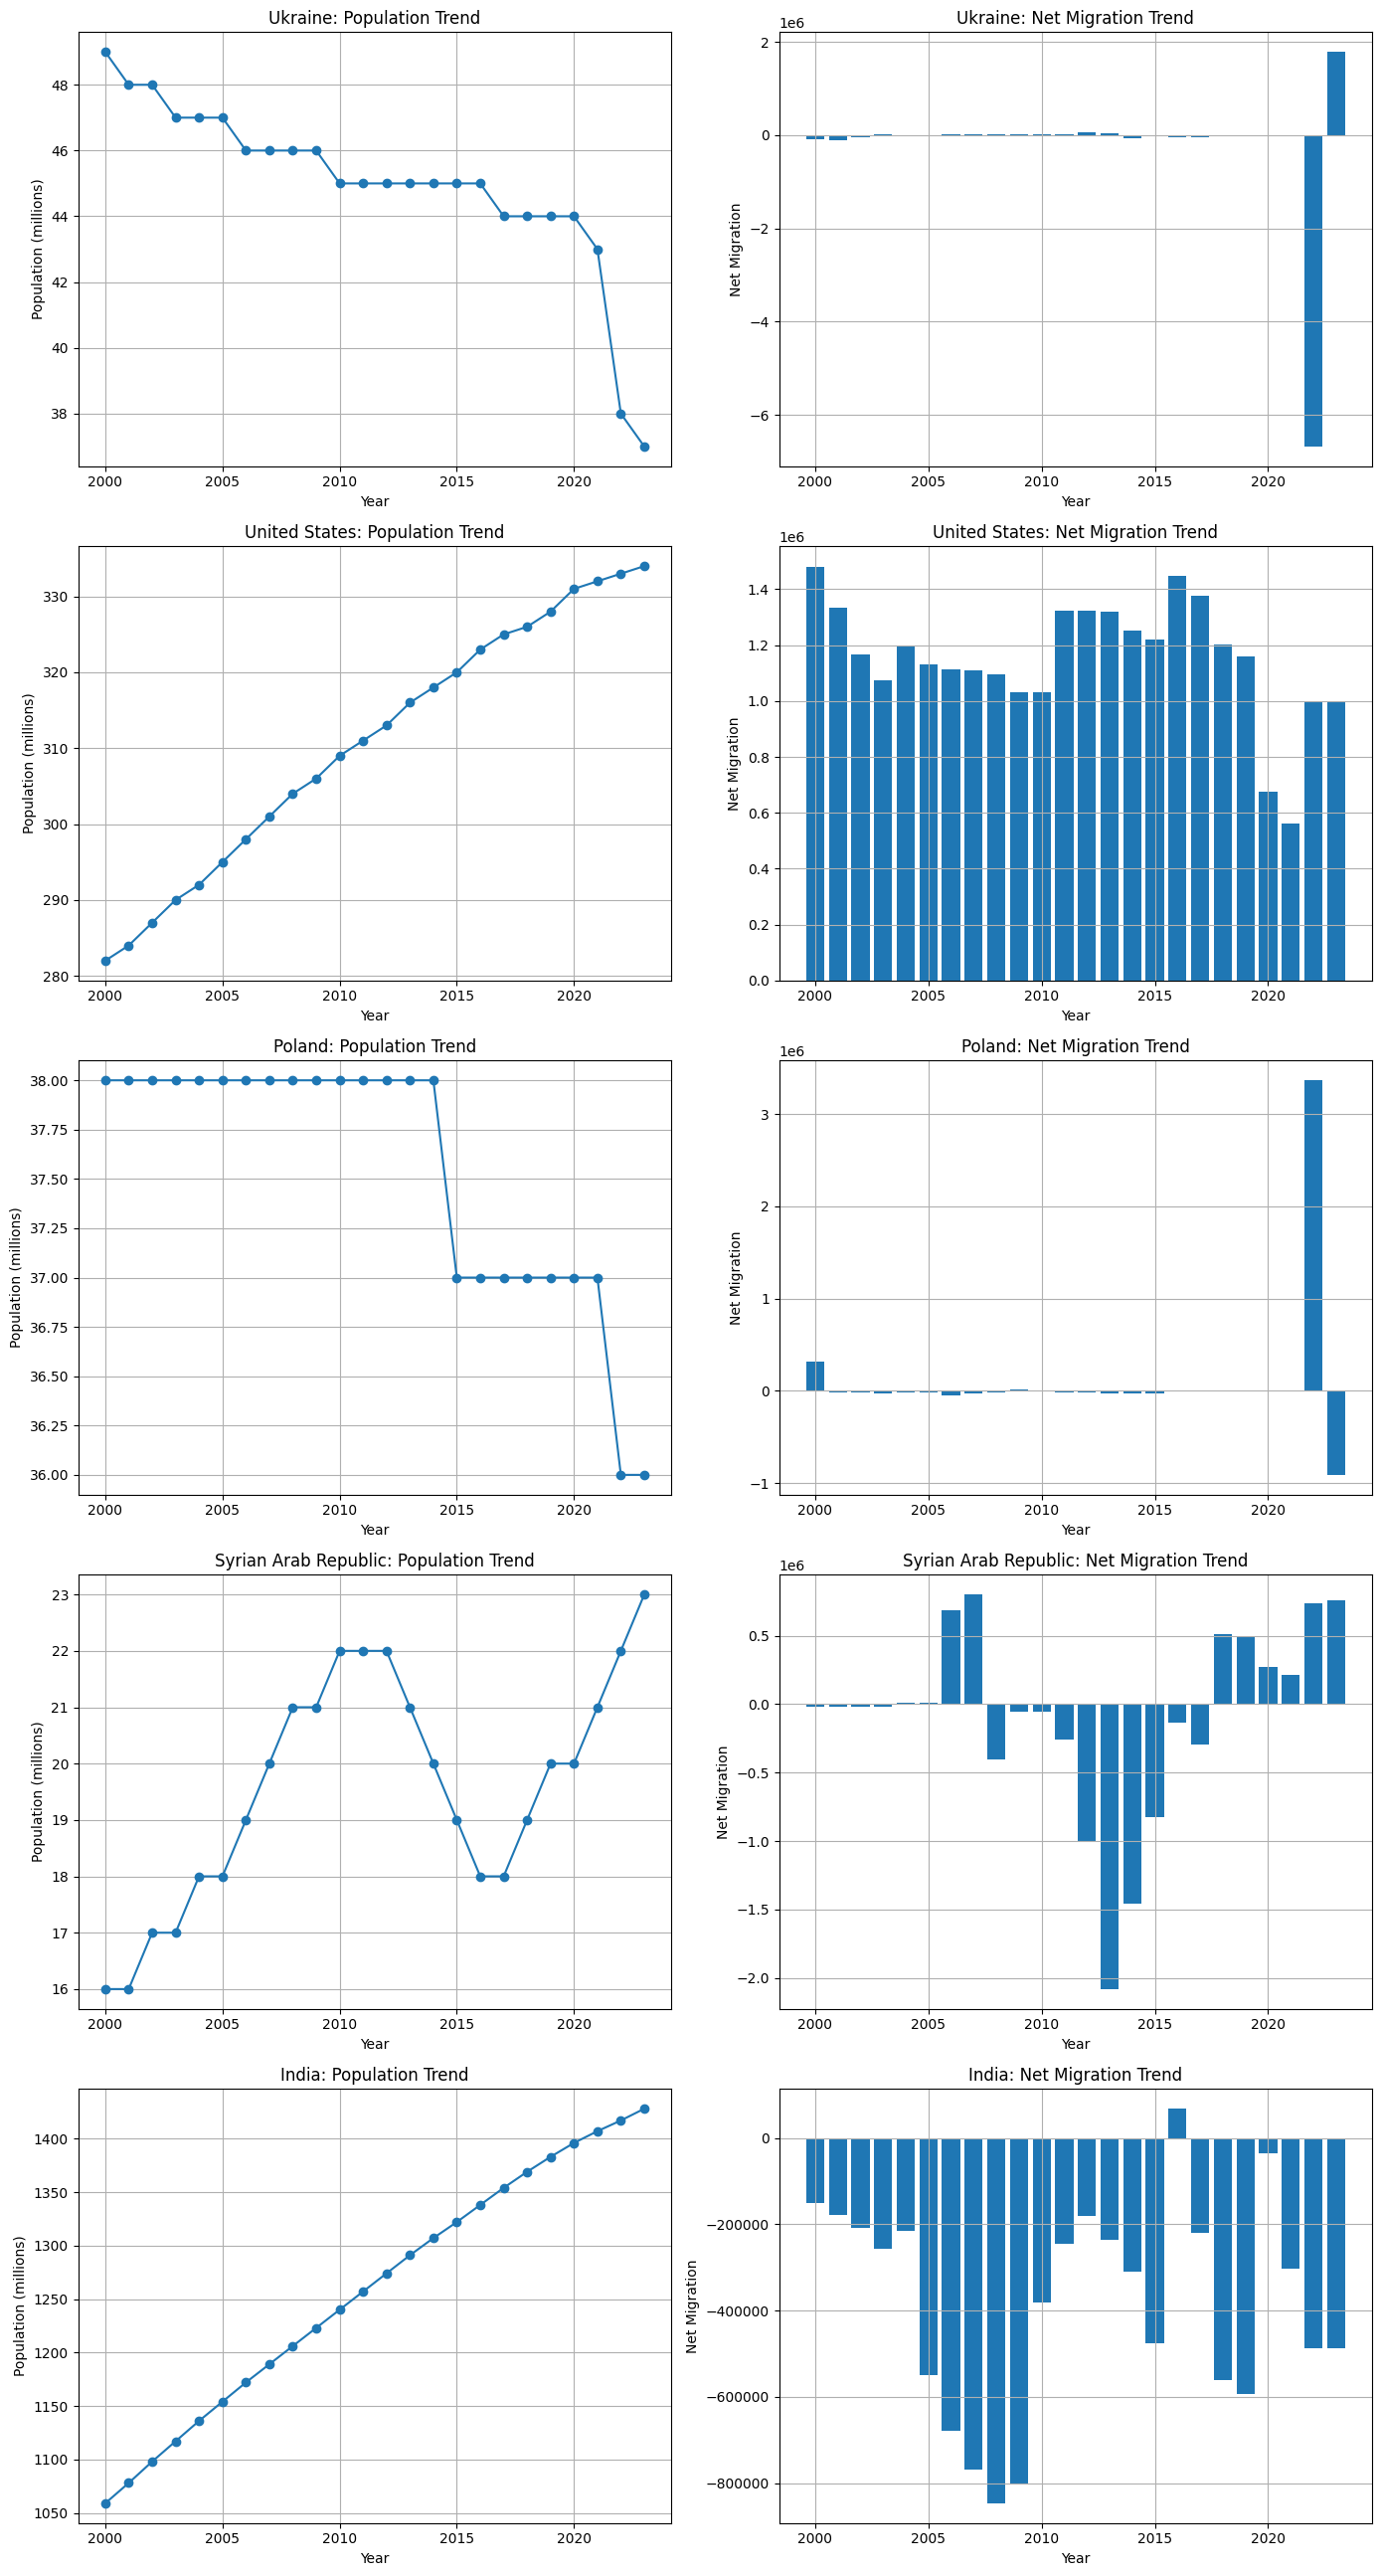

In [ ]:
# Time series plots: Population and Net Migration for each country (2000 and later)
country_data = df[(df['country'].isin(countries)) & (df['year'] >= 2000)]

fig, axs = plt.subplots(5, 2, figsize=(14, 26))
for i, country in enumerate(countries):
    data = country_data[country_data['country'] == country]
    # Population trend
    axs[i, 0].plot(data['year'], data['population_in_millions'], marker='o')
    axs[i, 0].set_title(f"{country}: Population Trend")
    axs[i, 0].set_ylabel('Population (millions)')
    axs[i, 0].set_xlabel('Year')
    axs[i, 0].grid(True)
    # Net migration trend
    axs[i, 1].bar(data['year'], data['netMigration'])
    axs[i, 1].set_title(f"{country}: Net Migration Trend")
    axs[i, 1].set_ylabel('Net Migration')
    axs[i, 1].set_xlabel('Year')
    axs[i, 1].grid(True)
plt.tight_layout()
plt.show()


* Each row represents one of the five selected countries.

* Left: population trend (since 2000).

* Right: net migration trend (annual bars).

This allows rapid comparison of demographic and migration shocks across countries.

### Growth Rate and Migration Rate Analysis

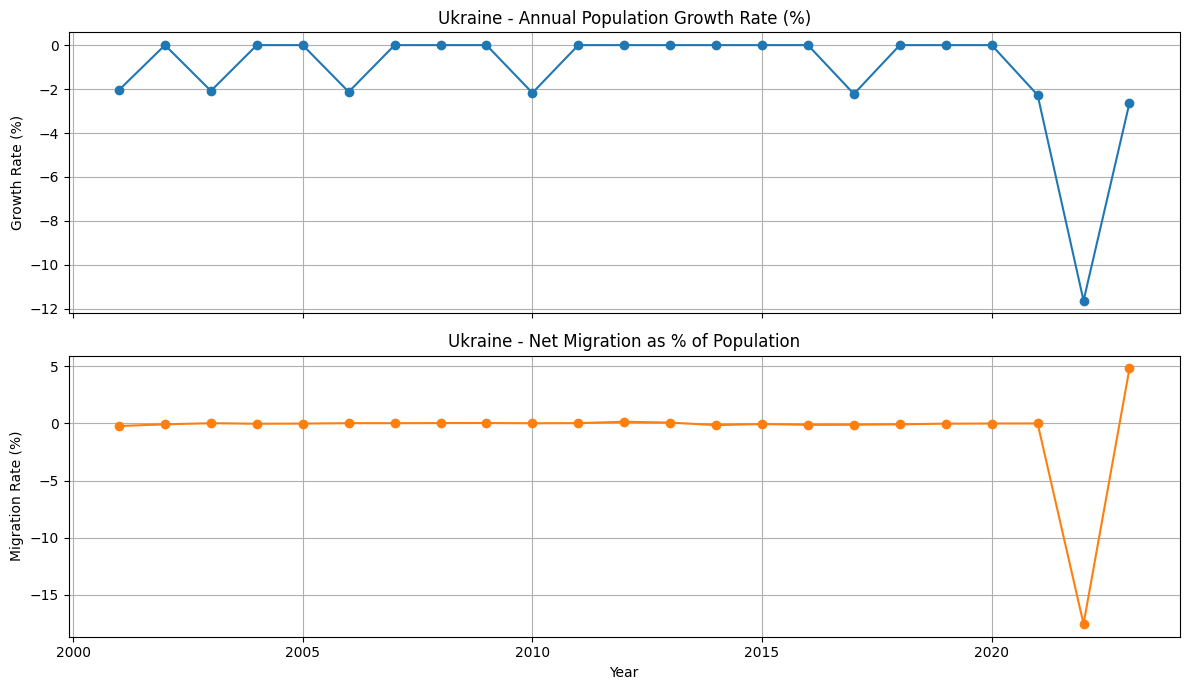

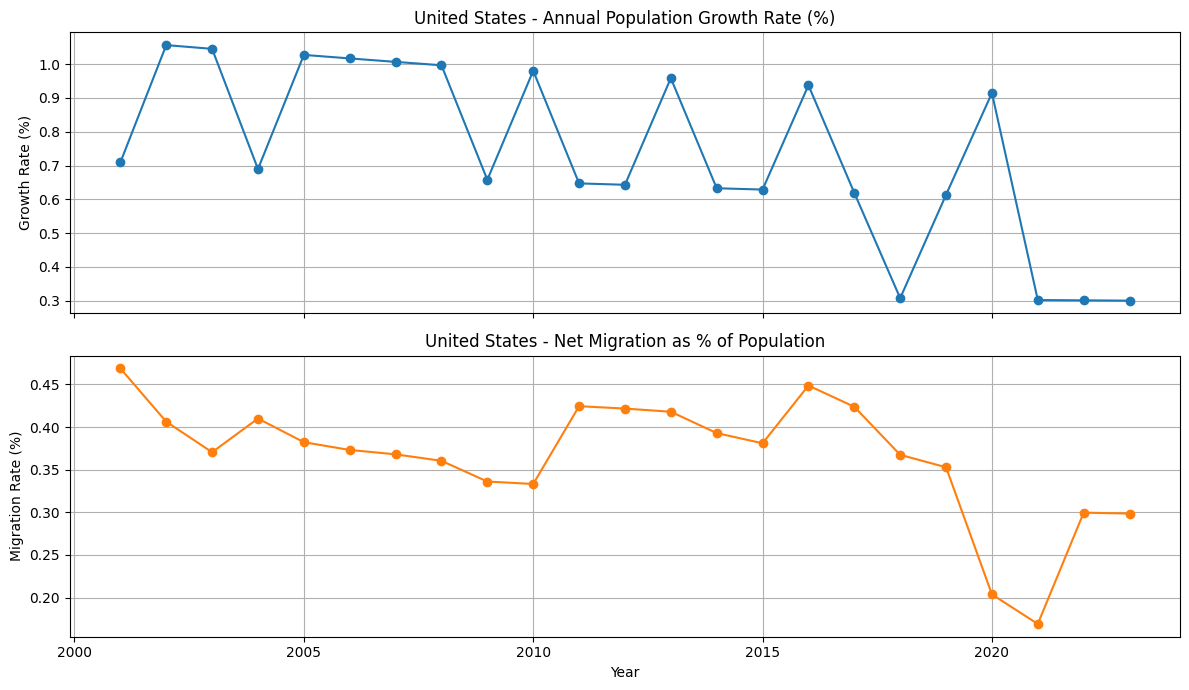

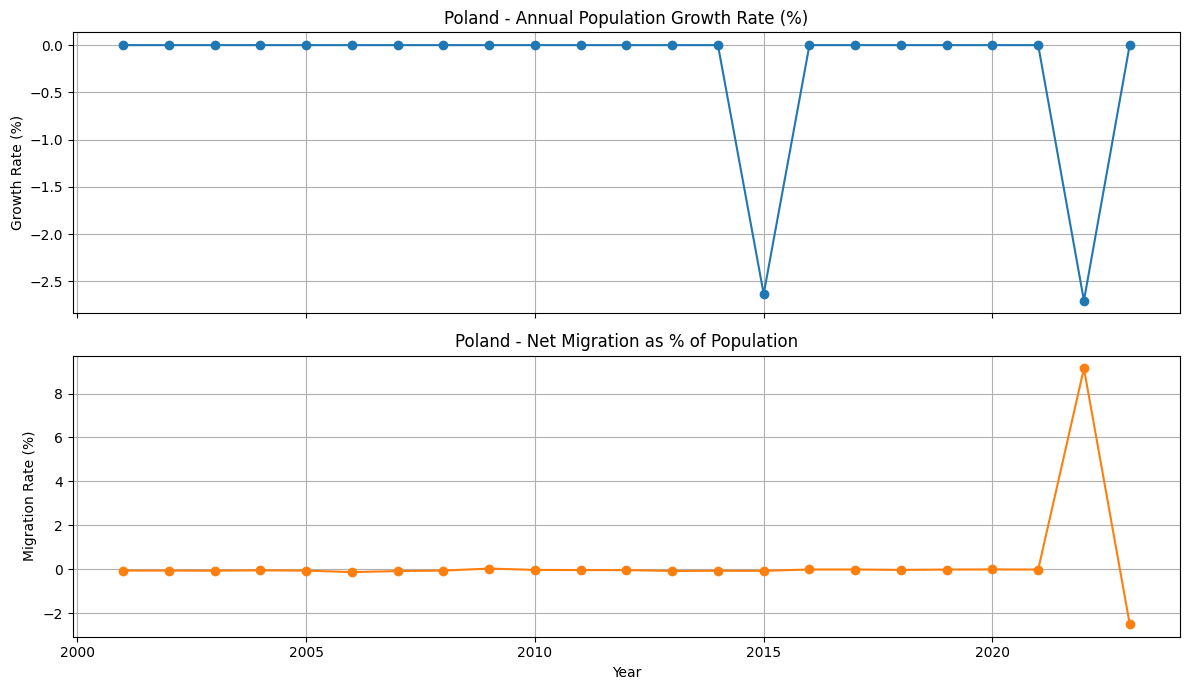

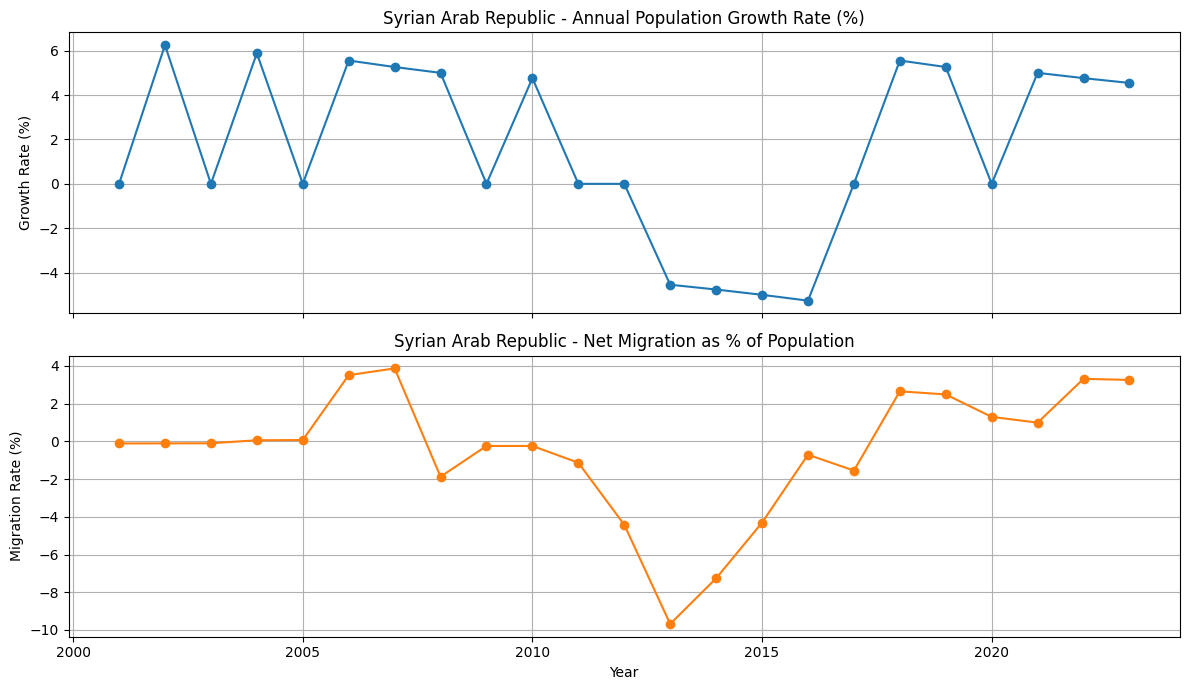

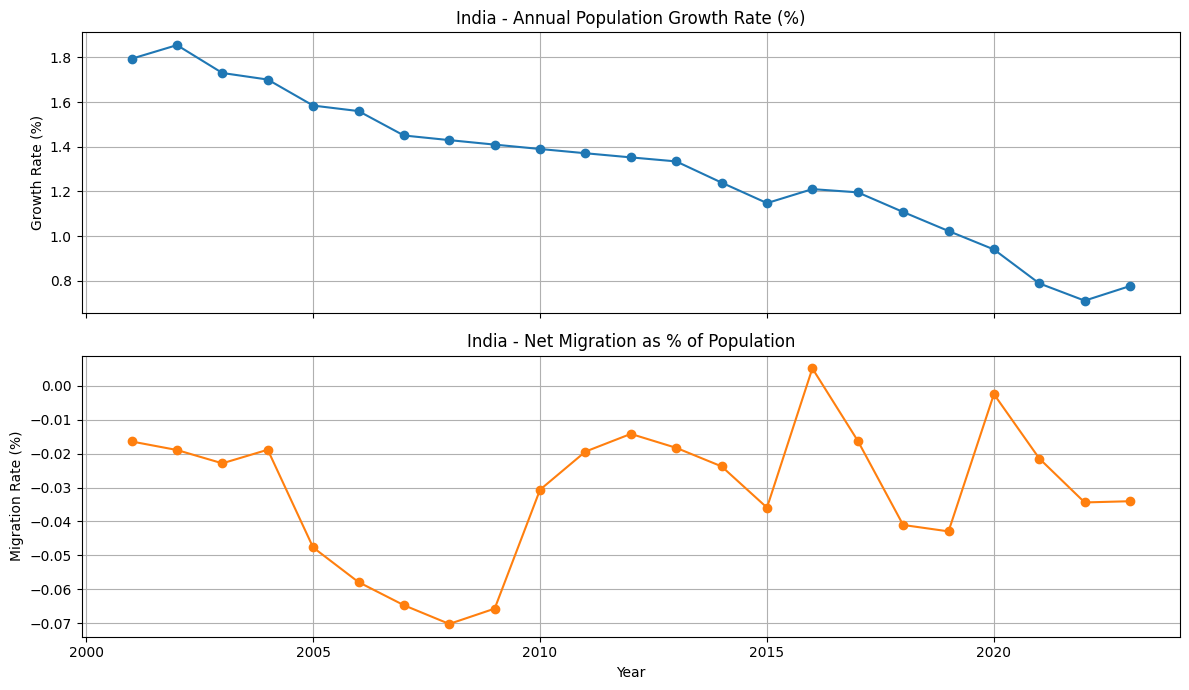

In [ ]:
for country in countries:
    data = df[(df['country'] == country) & (df['year'] >= 2000)].sort_values('year').copy()
    data['pop_growth_rate'] = data['population_in_millions'].pct_change() * 100
    data['migration_rate_perc'] = (data['netMigration'] / (data['population'] + 1e-7)) * 100
    data = data.dropna()

    fig, ax = plt.subplots(2, 1, figsize=(12, 7), sharex=True)
    ax[0].plot(data['year'], data['pop_growth_rate'], marker='o')
    ax[0].set_title(f'{country} - Annual Population Growth Rate (%)')
    ax[0].set_ylabel('Growth Rate (%)')
    ax[0].grid(True)

    ax[1].plot(data['year'], data['migration_rate_perc'], marker='o', color='tab:orange')
    ax[1].set_title(f'{country} - Net Migration as % of Population')
    ax[1].set_ylabel('Migration Rate (%)')
    ax[1].set_xlabel('Year')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

* For each country, annual population growth rate and migration rate (as a % of population) are visualized.

* This highlights demographic volatility and the degree to which migration drives population changes.

### Forecasting (Population & Net Migration, Next 5 Years)

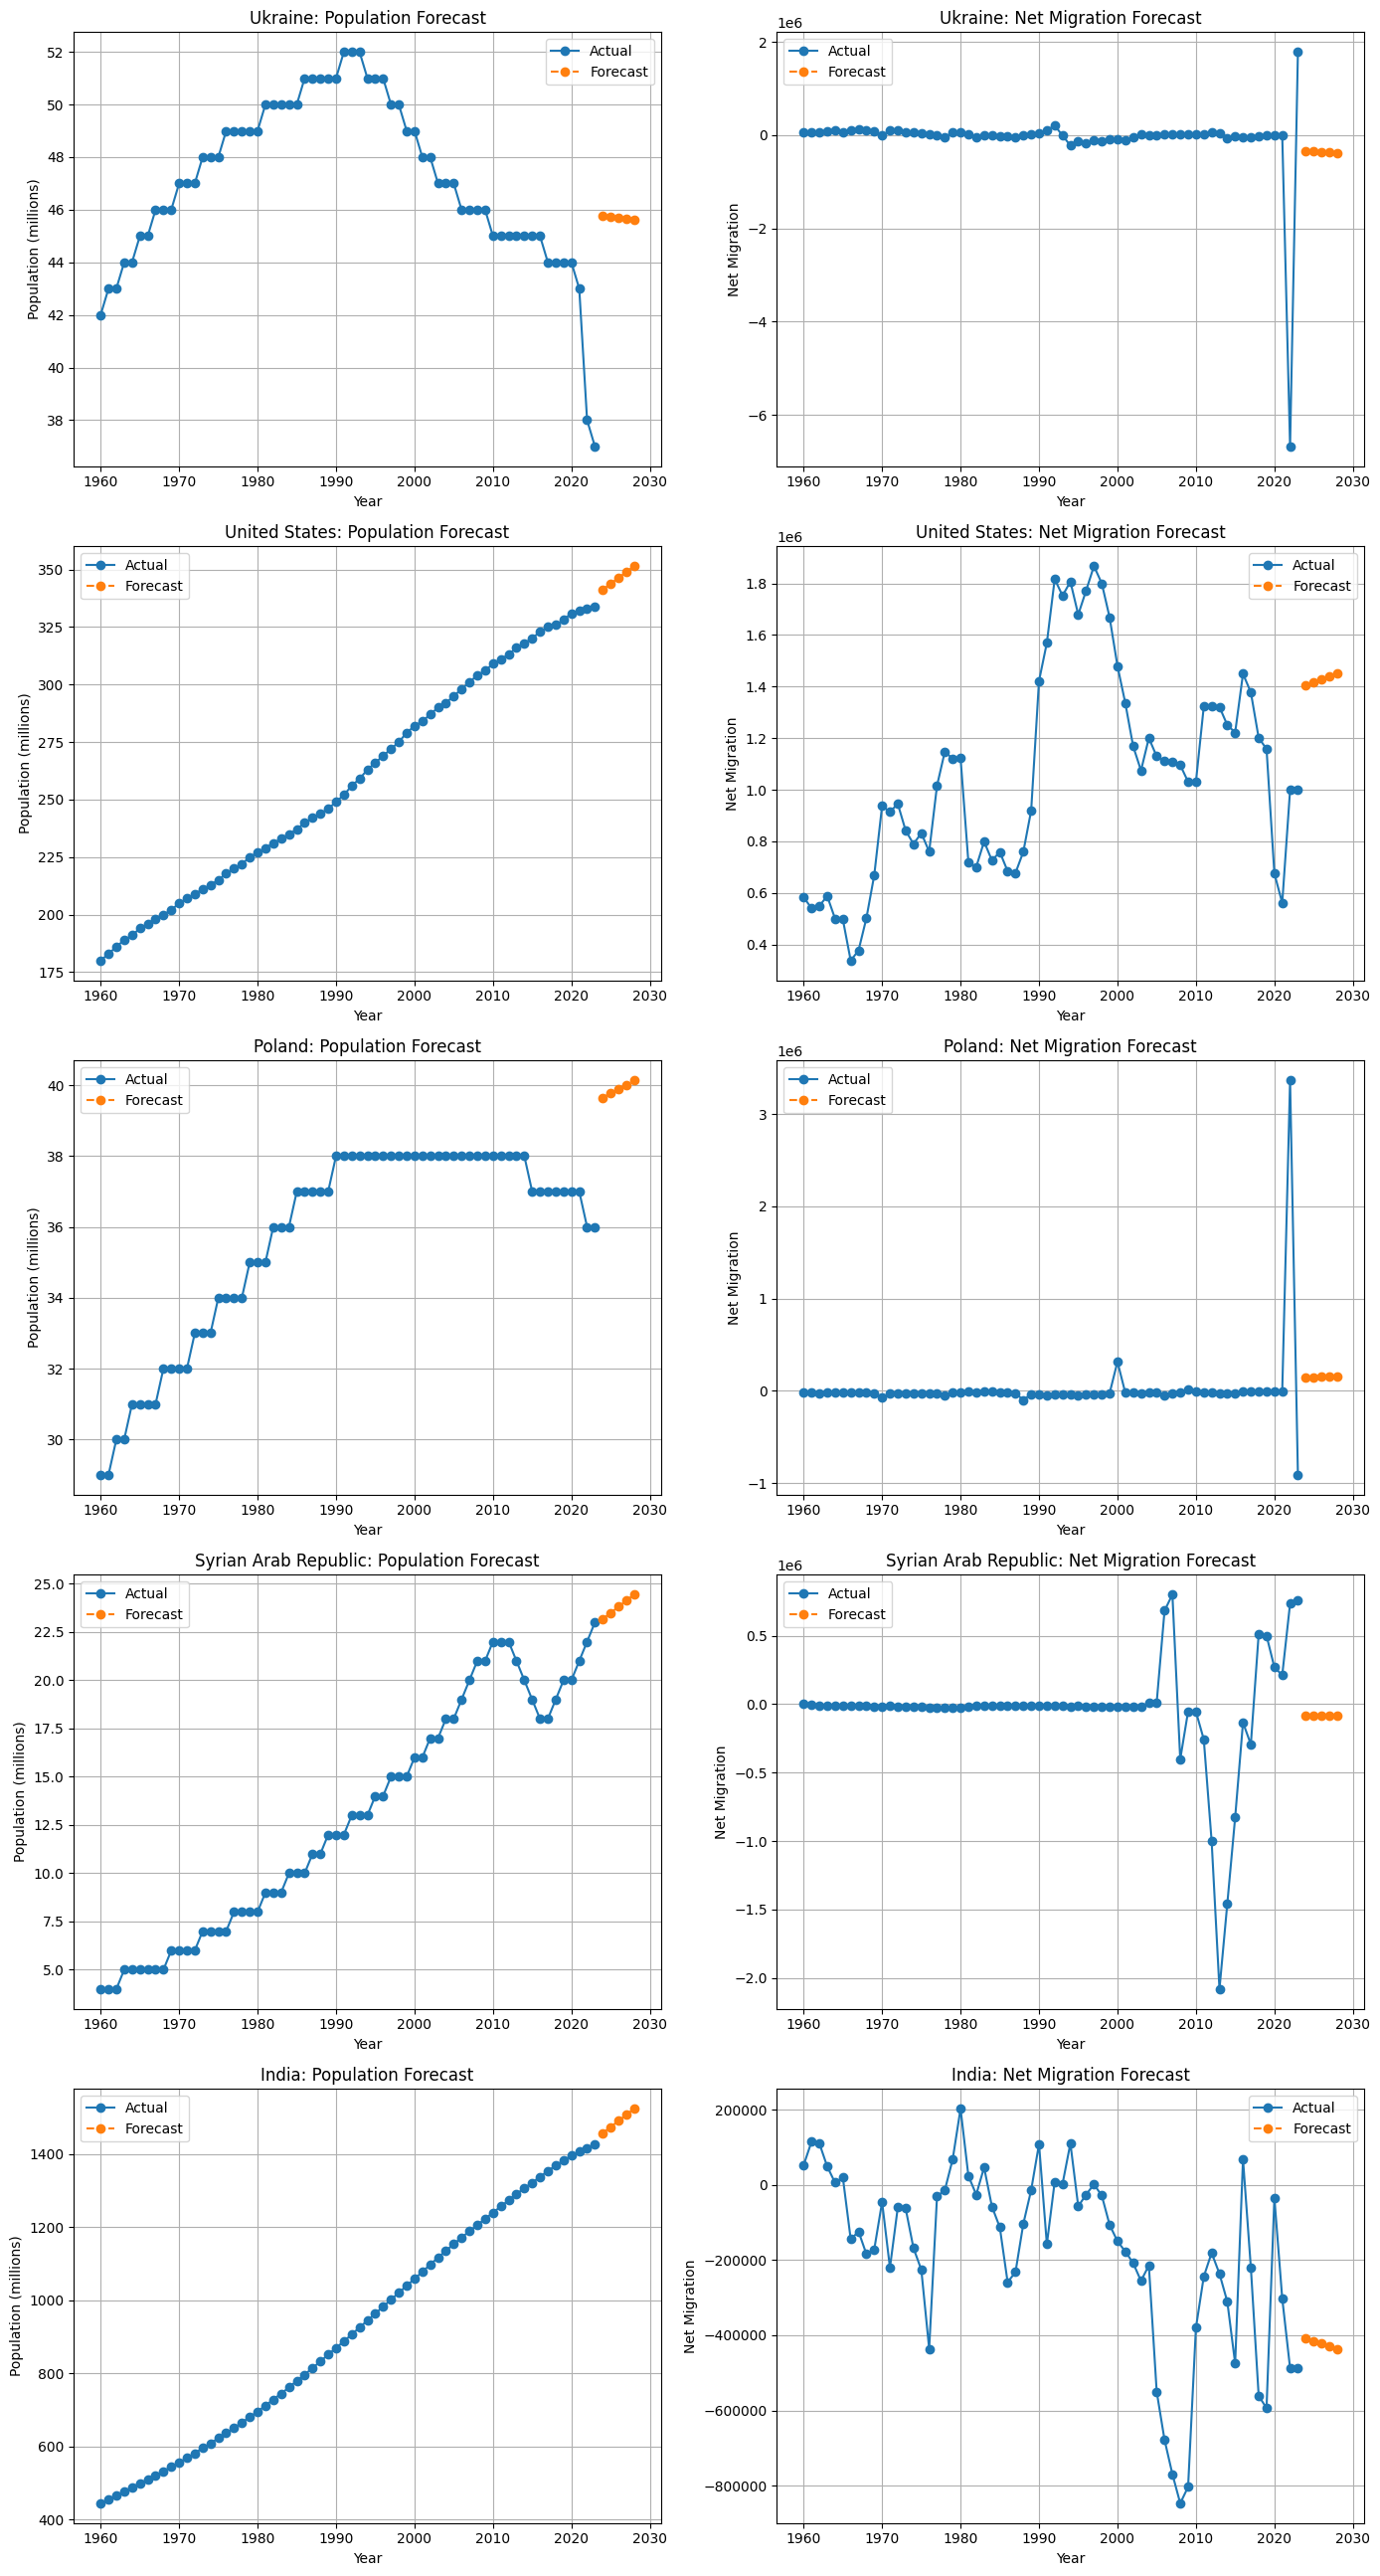

In [ ]:
from sklearn.linear_model import LinearRegression

future_steps = 5
results = {}

for country in countries:
    data = df[df['country'] == country].sort_values('year')
    X = data['year'].values.reshape(-1, 1)

    # Population forecast
    y_pop = data['population_in_millions'].values
    pop_model = LinearRegression().fit(X, y_pop)
    future_years = np.arange(data['year'].max() + 1, data['year'].max() + 1 + future_steps).reshape(-1, 1)
    y_pop_pred = pop_model.predict(future_years)

    # Net migration forecast
    y_mig = data['netMigration'].values
    mig_model = LinearRegression().fit(X, y_mig)
    y_mig_pred = mig_model.predict(future_years)

    results[country] = {
        'future_years': future_years.flatten(),
        'pop_pred': y_pop_pred,
        'mig_pred': y_mig_pred,
        'data': data
    }

# Visualize forecasts
fig, axs = plt.subplots(5, 2, figsize=(14, 26))
for i, country in enumerate(countries):
    d = results[country]['data']
    # Population forecast
    axs[i, 0].plot(d['year'], d['population_in_millions'], label='Actual', marker='o')
    axs[i, 0].plot(results[country]['future_years'], results[country]['pop_pred'], 'o--', label='Forecast')
    axs[i, 0].set_title(f"{country}: Population Forecast")
    axs[i, 0].set_ylabel('Population (millions)')
    axs[i, 0].set_xlabel('Year')
    axs[i, 0].legend()
    axs[i, 0].grid(True)
    # Net migration forecast
    axs[i, 1].plot(d['year'], d['netMigration'], label='Actual', marker='o')
    axs[i, 1].plot(results[country]['future_years'], results[country]['mig_pred'], 'o--', label='Forecast')
    axs[i, 1].set_title(f"{country}: Net Migration Forecast")
    axs[i, 1].set_ylabel('Net Migration')
    axs[i, 1].set_xlabel('Year')
    axs[i, 1].legend()
    axs[i, 1].grid(True)
plt.tight_layout()
plt.show()

* Both actual and forecasted population and net migration trends are visualized for each country.

* Dotted lines show the model's baseline forecast for the next five years.

## Top 5 Net Migration Trend Countries – Data-Driven Root Cause Analysis

### 🇺🇦 **Ukraine**
**Trend:** Massive negative net migration (large outflow)  
**Key Causes:**
- **War and Displacement (2022–Present):** Russia’s invasion led to Europe’s largest refugee crisis since WWII, with millions leaving Ukraine.
- **Pre-war Trends:** Even before the war, Ukraine saw population decline due to economic migration, low birth rates, and aging.
- **Data Reflection:** A sharp drop in net migration starting in 2022, directly matching war-driven displacement.

---

### 🇺🇸 **United States**
**Trend:** Consistently high positive net migration (large inflow)  
**Key Causes:**
- **Global Economic Magnet:** The U.S. attracts global migrants due to economic opportunities and established immigrant communities.
- **Policy-Driven Variation:** While policies affect annual numbers, overall migration inflow remains structurally strong.
- **Recent Developments:** Post-pandemic labor shortages and economic recovery have further boosted migration.
- **Data Reflection:** Persistent and stable net inflow, making the U.S. a top global migration destination.

---

### 🇵🇱 **Poland**
**Trend:** Sudden spike in positive net migration (inflow)  
**Key Causes:**
- **Ukrainian Refugee Influx:** Since 2022, millions of Ukrainians have taken refuge in Poland.
- **Labor Market Demand:** Prior to the war, Poland attracted workers from Ukraine and Belarus due to EU labor shortages.
- **Demographic Shift:** Traditionally a sender country, Poland became a net receiver due to the Ukrainian crisis.
- **Data Reflection:** Noticeable spike in net migration starting in 2022, clearly tied to the refugee wave.

---

### 🇸🇾 **Syrian Arab Republic**
**Trend:** Prolonged negative net migration (massive outflow)  
**Key Causes:**
- **Civil War (Since 2011):** The conflict displaced over 13 million people, with large numbers fleeing abroad.
- **Economic Collapse & Instability:** Infrastructure damage, sanctions, and insecurity have led to sustained emigration.
- **Data Reflection:** Net migration drops dramatically after 2011, matching the escalation of the civil war.

---

### 🇮🇳 **India**
**Trend:** Sustained negative net migration (stable outflow)  
**Key Causes:**
- **Labor Migration:** Millions move to the Gulf, Southeast Asia, and North America for work.
- **Economic Push Factors:** Large population and rural poverty drive overseas labor migration.
- **Remittance Economy:** India is the top recipient of global remittances, making migration a key economic factor.
- **Data Reflection:** Consistently negative net migration, not crisis-driven but economically structural.

---

## **Summary Table: Key Causes**

| Country      | Net Migration Trend     | Main Drivers                                  |
|--------------|------------------------|-----------------------------------------------|
| **Ukraine**  | 🚨 Massive outflow      | War, refugee crisis, economic decline         |
| **USA**      | 📈 Massive inflow       | Economic pull, migration policy               |
| **Poland**   | 🔄 Sudden inflow        | Ukrainian refugees, labor market demand       |
| **Syria**    | 📉 Prolonged outflow    | Civil war, instability, humanitarian crisis   |
| **India**    | 📉 Stable outflow       | Labor migration, remittances, economic factors|

---

## United States: Deep-Dive Analysis on Population and Migration

### Data Preparation: U.S. Subset (Last 30 Years)

In [ ]:
# Extract U.S. data (recent 30 years)
us = df[df['country'] == 'United States'].sort_values('year')
us_recent = us[us['year'] >= (us['year'].max() - 30)]

## U.S. Population and Net Migration Trends (Time Series Analysis)

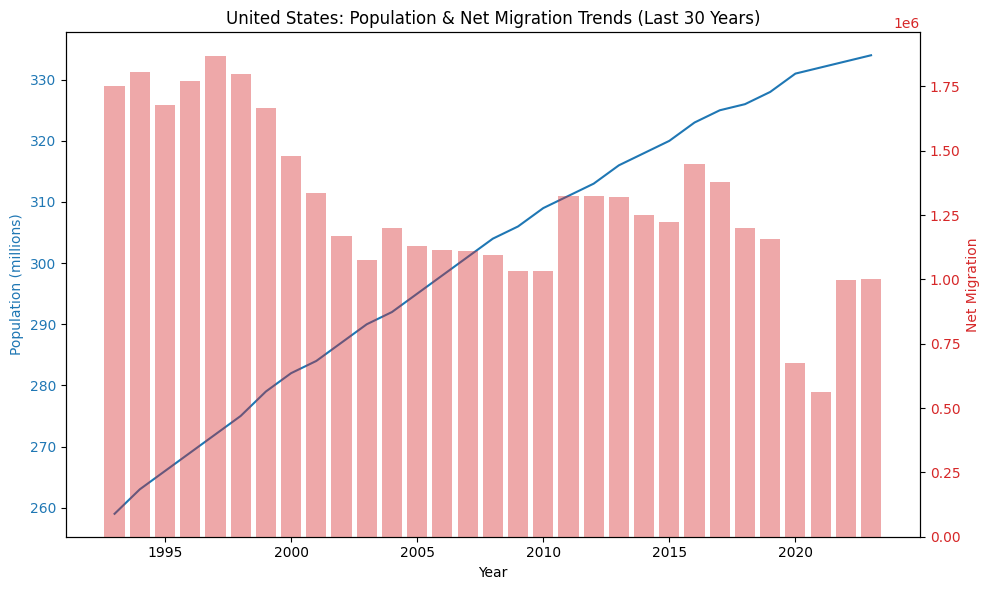

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Population trend (primary y-axis)
ax1.plot(us_recent['year'], us_recent['population_in_millions'], color='tab:blue', label='Population (millions)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Net migration (secondary y-axis)
ax2 = ax1.twinx()
ax2.bar(us_recent['year'], us_recent['netMigration'], alpha=0.4, color='tab:red', label='Net Migration')
ax2.set_ylabel('Net Migration', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("United States: Population & Net Migration Trends (Last 30 Years)")
fig.tight_layout()
plt.show()

* The blue line represents the U.S. population (in millions), showing a steady increase over time.

* The red bars represent net migration for each year, illustrating the scale and variability of annual inflows.

Dual y-axes allow for direct comparison of demographic and migration dynamics over the last three decades.

### U.S. Annual Population Growth Rate and Net Migration Rat

<ipython-input-13-e64a6ed70987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_recent['pop_growth_rate'] = us_recent['population_in_millions'].pct_change() * 100
<ipython-input-13-e64a6ed70987>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_recent['migration_rate_perc'] = (us_recent['netMigration'] / (us_recent['population'] + 1e-7)) * 100  # %


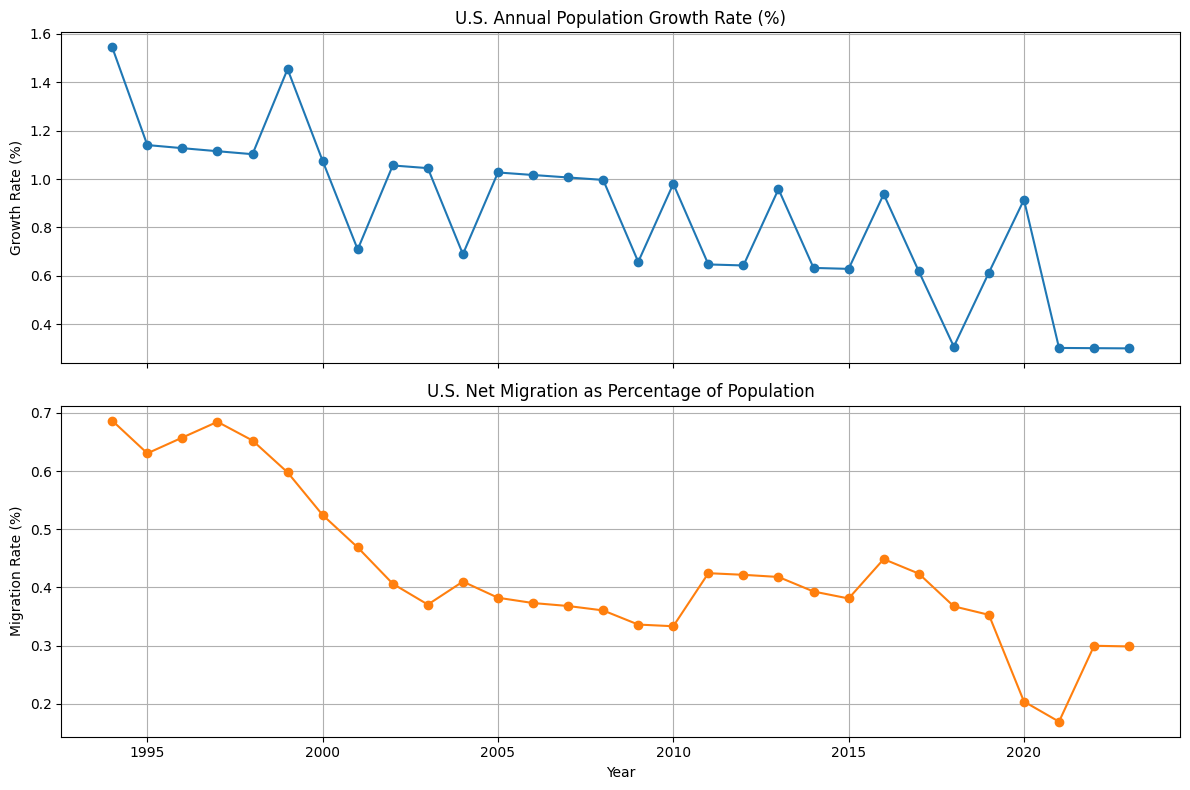

In [ ]:
# Calculate annual growth rate and migration rate
us_recent['pop_growth_rate'] = us_recent['population_in_millions'].pct_change() * 100
us_recent['migration_rate_perc'] = (us_recent['netMigration'] / (us_recent['population'] + 1e-7)) * 100  # %

us_recent = us_recent.dropna()

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(us_recent['year'], us_recent['pop_growth_rate'], marker='o')
ax[0].set_title('U.S. Annual Population Growth Rate (%)')
ax[0].set_ylabel('Growth Rate (%)')
ax[0].grid(True)

ax[1].plot(us_recent['year'], us_recent['migration_rate_perc'], marker='o', color='tab:orange')
ax[1].set_title('U.S. Net Migration as Percentage of Population')
ax[1].set_ylabel('Migration Rate (%)')
ax[1].set_xlabel('Year')
ax[1].grid(True)

plt.tight_layout()
plt.show()

* The top plot shows the annual U.S. population growth rate (percentage change).

* The bottom plot shows net migration as a percentage of the total population, highlighting the role of migration in population change.

These metrics offer a nuanced view of both organic (births/deaths) and migration-driven demographic changes.

### Relationship Between Net Migration and Population Size

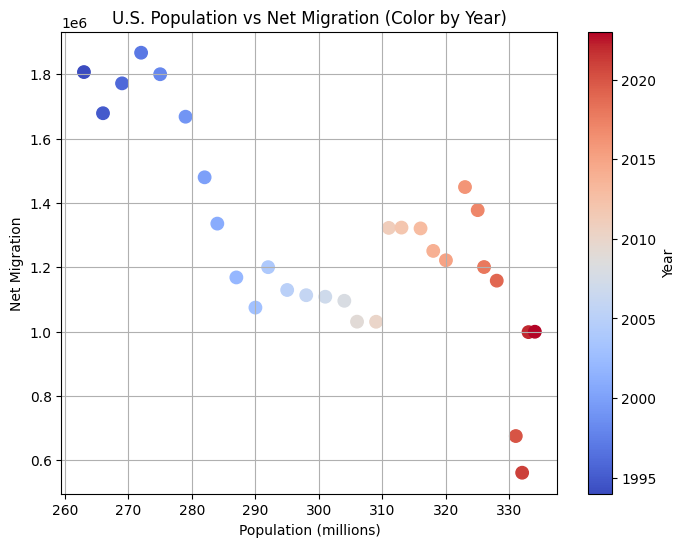

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    us_recent['population_in_millions'],
    us_recent['netMigration'],
    c=us_recent['year'],
    cmap='coolwarm',
    s=80
)
plt.xlabel('Population (millions)')
plt.ylabel('Net Migration')
plt.title('U.S. Population vs Net Migration (Color by Year)')
plt.colorbar(label='Year')
plt.grid(True)
plt.show()

* Each point represents a year, colored by year (more recent years in warmer colors).

* This scatterplot shows whether periods of higher population are associated with greater migration inflow.

It is useful for visualizing possible structural shifts in migration as population grows.

# Key Insights: United States Migration & Demography

- The U.S. population has consistently grown over the past three decades, with net migration accounting for a substantial portion of total growth.
- Net migration is highly positive for most years, reaffirming the U.S. as a major global migration destination.
- The annual population growth rate has gradually declined, reflecting demographic transition, yet migration continues to offset this trend.
- Linear forecasts suggest sustained population growth and stable migration inflow in the near future, barring major policy or economic shocks.
- These patterns are critical for workforce planning, social policy, infrastructure development, and economic competitiveness.